In [108]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]
adult_df = pd.read_csv(url, names=columns, na_values=" ?", skipinitialspace=True)

In [93]:
# adult_df.replace('?', pd.NA , inplace=True)

In [94]:
adult_df = adult_df[
    (adult_df["workclass"] != "?") & 
    (adult_df["occupation"] != "?") & 
    (adult_df["native-country"] != "?")
]

In [95]:
count = 0
values = []

for index, row in adult_df.iterrows():
    if row["workclass"] == "?" or row["occupation"] == "?" or row["native-country"] == "?":
        count = count + 1
        values.append(index)
        
print(count,values)

0 []


In [96]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [97]:
question_mark_rows = adult_df[adult_df.eq('?').any(axis=1)]
question_mark_rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [98]:
adult_df = adult_df.drop(columns=["capital-gain", "capital-loss"])

In [99]:
adult_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [100]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Assuming `adult_df` is your DataFrame

# Select categorical columns
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation',
                    'relationship', 'race', 'sex', 'native-country']

# Initialize the OneHotEncoder and LabelEncoder
onehot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
label_encoder = LabelEncoder()

# Fit and transform the categorical columns
for col in categorical_cols:
    if col in ['workclass', 'occupation', 'native-country']:
        adult_df[col] = label_encoder.fit_transform(adult_df[col])
    else:
        categorical_df = adult_df[col].astype(str)
        encoded_cols = onehot_encoder.fit_transform(categorical_df.values.reshape(-1, 1))
        encoded_df = pd.DataFrame(encoded_cols, columns=[
            f"{col}_{val}" for val in onehot_encoder.categories_[0]
        ])
        adult_df = pd.concat([adult_df.drop(col, axis=1), encoded_df], axis=1)

# Display the first few rows of the encoded dataframe
adult_df.head()

,age,workclass,fnlwgt,education-num,occupation,hours-per-week,native-country,income,education_10th,education_11th,...,relationship_nan,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,race_nan,sex_Female,sex_Male,sex_nan
0,39.0,5.0,77516.0,13.0,0.0,40.0,38,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50.0,4.0,83311.0,13.0,3.0,13.0,38,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38.0,2.0,215646.0,9.0,5.0,40.0,38,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53.0,2.0,234721.0,7.0,5.0,40.0,38,<=50K,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.0,2.0,338409.0,13.0,9.0,40.0,4,<=50K,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [101]:
adult_df

,age,workclass,fnlwgt,education-num,occupation,hours-per-week,native-country,income,education_10th,education_11th,...,relationship_nan,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,race_nan,sex_Female,sex_Male,sex_nan
0,39.0,5.0,77516.0,13.0,0.0,40.0,38,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,50.0,4.0,83311.0,13.0,3.0,13.0,38,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38.0,2.0,215646.0,9.0,5.0,40.0,38,<=50K,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,53.0,2.0,234721.0,7.0,5.0,40.0,38,<=50K,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,28.0,2.0,338409.0,13.0,9.0,40.0,4,<=50K,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32531,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32539,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
32541,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


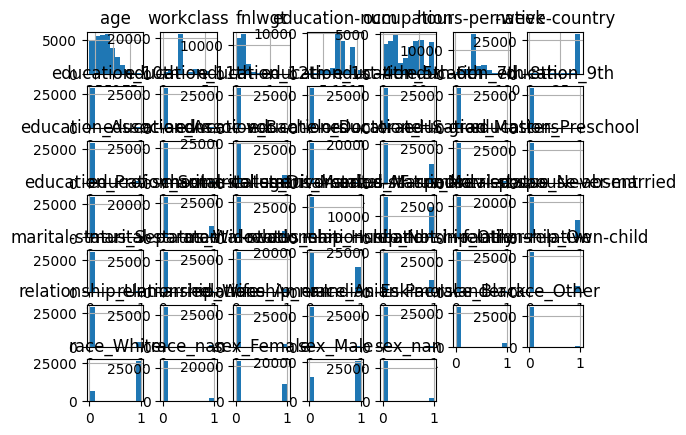

In [102]:
from pandas import read_csv
from matplotlib import pyplot

# select columns with numerical data types
num_ix = adult_df.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = adult_df[num_ix]
# create a histogram plot of each numeric variable
subset.hist()
pyplot.show()

In [103]:
adult_df['income'] = adult_df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the features and target variable
X = adult_df.drop('income', axis=1)
y = adult_df['income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.8071549209273761


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4996
           1       0.64      0.39      0.49      1517

    accuracy                           0.81      6513
   macro avg       0.74      0.66      0.68      6513
weighted avg       0.79      0.81      0.79      6513



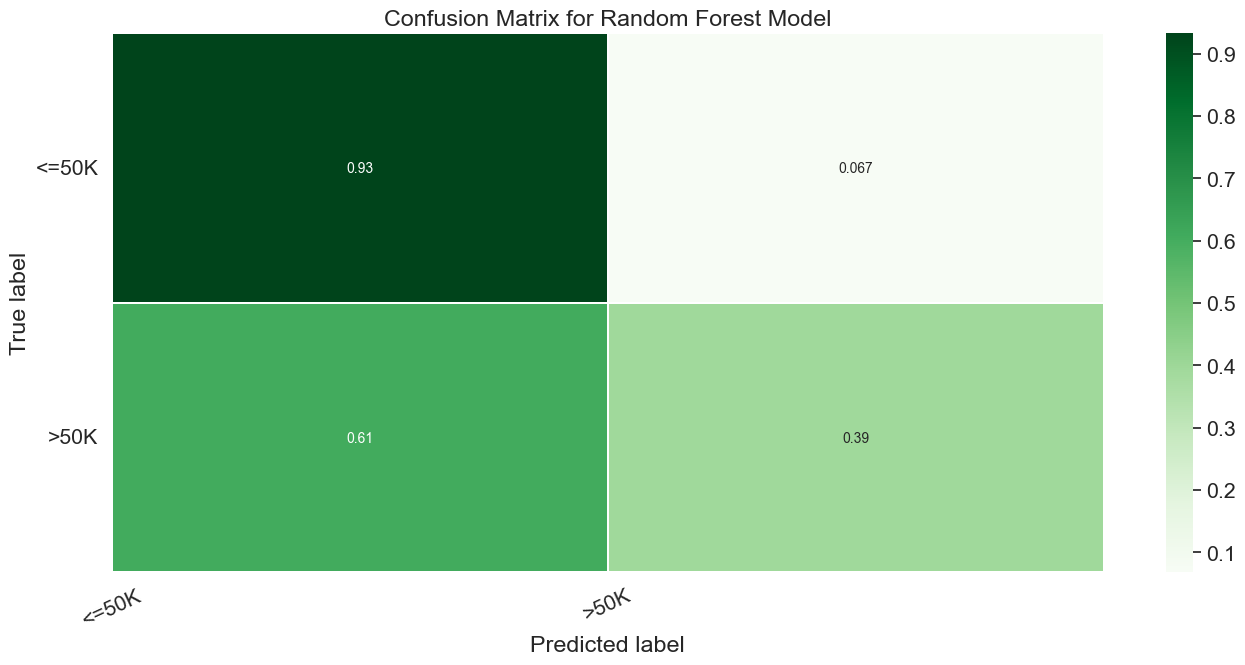

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['<=50K', '>50K']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [119]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"], skipinitialspace=True)

# Split the dataset into features and target
X = df.drop('income', axis=1)
y = df['income']

# Encode categorical variables
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Calculate feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)
importances = rf.feature_importances_

# Calculate cumulative importances
cumulative_importances = np.cumsum(importances)

# Find number of features for cumulative importance of 95%
num_features = np.where(cumulative_importances > 0.95)[0][0] + 1

# Extract the names of the most important features
feature_names = list(X.columns)
important_feature_names = [feature_names[i] for i in np.argsort(importances)[-num_features:]]

# Extract the most important features
important_features = X_encoded[:, np.argsort(importances)[-num_features:]]

In [121]:
important_feature_names

['sex',
 'native-country',
 'education',
 'capital-loss',
 'workclass',
 'occupation',
 'marital-status',
 'hours-per-week',
 'education-num',
 'relationship',
 'capital-gain',
 'age',
 'fnlwgt']

In [124]:
# Extract the most important features
important_features = X_encoded[:, np.argsort(importances)[-num_features:]]

# Handle the skewed nature of the data
positive_class = np.where(y == '>50K')[0]
negative_class = np.where(y == '<=50K')[0]

# Oversample the minority class
negative_class = np.random.choice(negative_class, size=len(positive_class), replace=True)

# Combine the positive and negative classes
X_train = np.concatenate([important_features[positive_class], important_features[negative_class]], axis=0)
y_train = np.concatenate([y[positive_class], y[negative_class]], axis=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model using the most important features
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Print the accuracy score and the classification report
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8390181702263309
Classification Report:
 {'<=50K': {'precision': 0.8602006688963211, 'recall': 0.8128950695322377, 'f1-score': 0.8358791030224244, 'support': 1582.0}, '>50K': {'precision': 0.8197320341047503, 'recall': 0.8655948553054662, 'f1-score': 0.8420394119487019, 'support': 1555.0}, 'accuracy': 0.8390181702263309, 'macro avg': {'precision': 0.8399663515005357, 'recall': 0.8392449624188519, 'f1-score': 0.8389592574855631, 'support': 3137.0}, 'weighted avg': {'precision': 0.8401405072447774, 'recall': 0.8390181702263309, 'f1-score': 0.8389327467522176, 'support': 3137.0}}


In [129]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Load the new dataset
new_df = pd.read_csv("adult.test", names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"], skipinitialspace=True)

# Select the same 13 features as the original dataset
new_X = new_df[["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week"]]

new_y = new_df['income']

# Encode categorical variables
encoder = OrdinalEncoder()
new_X_encoded = encoder.fit_transform(new_X)

# Make predictions on the new dataset
new_y_pred = rf.predict(new_X_encoded)

# Calculate the accuracy score
new_accuracy = accuracy_score(new_y, new_y_pred)

# Calculate the classification report
new_report = classification_report(new_y, new_y_pred, output_dict=True)

# Print the accuracy score and the classification report
print("New Accuracy:", new_accuracy)
print("New Classification Report:\n", new_report)

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [134]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Load the new dataset
new_df = pd.read_csv("adult.test", names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"], skipinitialspace=True)

# Select the same 13 features as the original dataset
new_X = new_df[["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week"]]

new_y = new_df['income']

# Convert the income classes to binary targets
new_y_binary = np.where(new_y == '<=50K', 0, 1)

# Encode categorical variables
encoder = OrdinalEncoder()
new_X_encoded = encoder.fit_transform(new_X)

# Make predictions on the new dataset
new_y_pred = rf.predict(new_X_encoded)

# Convert the predicted labels to binary
new_y_pred_binary = np.where(new_y_pred == '<=50K', 0, 1)

# Calculate the accuracy score
new_accuracy = accuracy_score(new_y_binary, new_y_pred_binary)

# Calculate the classification report
new_report = classification_report(new_y_binary, new_y_pred_binary, output_dict=True, zero_division=0)
# Print the accuracy score and the classification report
print("New Accuracy:", new_accuracy)
print("New Classification Report:\n", new_report)

New Accuracy: 0.027637882324038816
New Classification Report:
 {'0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}, '1': {'precision': 1.0, 'recall': 0.027637882324038816, 'f1-score': 0.053789146545541476, 'support': 16282.0}, 'accuracy': 0.027637882324038816, 'macro avg': {'precision': 0.5, 'recall': 0.013818941162019408, 'f1-score': 0.026894573272770738, 'support': 16282.0}, 'weighted avg': {'precision': 1.0, 'recall': 0.027637882324038816, 'f1-score': 0.053789146545541476, 'support': 16282.0}}


In [135]:
test_df = pd.read_csv("adult.test", names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"], skipinitialspace=True)

In [140]:
test_df = test_df[
    (test_df["workclass"] != "?") & 
    (test_df["occupation"] != "?") & 
    (test_df["native-country"] != "?")
]

In [141]:
question_mark_rows = test_df[test_df.eq('?').any(axis=1)]
question_mark_rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [142]:
test_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,|1x3 Cross validator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,33,Private,245211.0,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
